## Polymer Project: 
## Implementation of the pivot algorithm to simulate Self-avoiding-random walks

 Names: Mandus Aldag, Alexandros Mylanos

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def check_self_avoidance(coords, pivot = None):
    if pivot == None:
        N = np.size(coords, axis=1)
        hashset = set()
        for i in range(N):
            tmp_tuple = tuple(coords[:,i])
            if tmp_tuple in hashset:
                return True
            else:
                hashset.add(tmp_tuple)
                
        
        return False
    
    else:
        N = np.size(coords, axis=1)
        current = pivot
        hashset = set()
        i=1
        while current >= 0 or current < N:
           tmp_tuple = tuple(coords[:,current+i])
           if tmp_tuple in hashset:
                return True
           else:
               hashset.add(tmp_tuple)  
            
            
            
            tmp_tuple = tuple(coords[:,current+i])
           if tmp_tuple in hashset:
                return True
           else:
                hashset.add(tmp_tuple)
            



    

In [3]:
def generate_random_walk(L):
    coord = np.zeros((2,L),dtype=int)
    for l in range(1,L):
        direction = np.random.randint(0,4) # clock wise starting from the top
        if direction == 0:
            coord[0,l] = coord[0,l-1]
            coord[1,l] = coord[1,l-1]+1 

        elif  direction == 1:
            coord[0,l] = coord[0,l-1]+1
            coord[1,l] = coord[1,l-1]
        
        elif  direction == 2:
            coord[0,l] = coord[0,l-1]
            coord[1,l] = coord[1,l-1]-1

        elif  direction == 3:
            coord[0,l] = coord[0,l-1]-1
            coord[1,l] =  coord[1,l-1]
    
    return coord
        

In [4]:
def initial_SAW(N: int): #Dimerisation
    if N <= 5:
        tmp = True
        while tmp:
            walk = generate_random_walk(N)
            tmp = check_self_avoidance(walk)
        return walk



    else:
        tmp = True
        while tmp:
            first = initial_SAW(N//2)
            second = initial_SAW(N-N//2+1)
            translated = (first[:,-1]+second.T).T
            concatenated = np.concatenate((first,translated[:,1:]),axis=1)
            tmp = check_self_avoidance(concatenated)

        return concatenated


In [30]:
def pivot_point(coord):
    N = np.size(coord,axis=1)
    return np.random.randint(1,N)

def symmetry_op(coord):
    N = np.size(coord,axis=1)
    g = np.random.randint(0,7)
    if g==0: #+90°(mathematically)
        for i in range(N):
            coord[:,i] = np.dot(np.array([[0,-1],[1,0]]), coord[:,i])
    elif g==1: #-90°(mathematically)
        for i in range(N):
            coord[:,i] = np.dot(np.array([[0,1],[-1,0]]), coord[:,i])
    elif g==2: #180°
        for i in range(N):
            coord[:,i] = np.dot(np.array([[-1,0],[0,-1]]), coord[:,i])
    elif g==3: #x-axis symmetry
        for i in range(N):
            coord[:,i] = np.dot(np.array([[1,0],[0,-1]]), coord[:,i])
    elif g==4: #y-axis symmetry
        for i in range(N):
            coord[:,i] = np.dot(np.array([[-1,0],[0,1]]), coord[:,i])
    elif g==5: #diagonal reflection upperright-bottomleft
        for i in range(N):
            coord[:,i] = np.dot(np.array([[0,1],[1,0]]), coord[:,i])
    elif g==6: #diagonal reflection upperleft-bottomright
        for i in range(N):
            coord[:,i] = np.dot(np.array([[0,-1],[-1,0]]), coord[:,i])
    print("g = ",g)
    return coord
    

In [31]:
def pivot_step(coord):
    N = np.size(coord,axis=1)
    

    pivot = np.random.randint(1,N)
    print("pivot = ",pivot)
    to_be_operated = coord[:,pivot:]
    to_be_operated = (to_be_operated.T-to_be_operated[:,0]).T
    operated = symmetry_op(to_be_operated)
    operated = (operated.T+coord[:,pivot]).T

    coord_new = np.concatenate((coord[:,:pivot],operated),axis=1)

    return coord_new


pivot =  4
g =  6


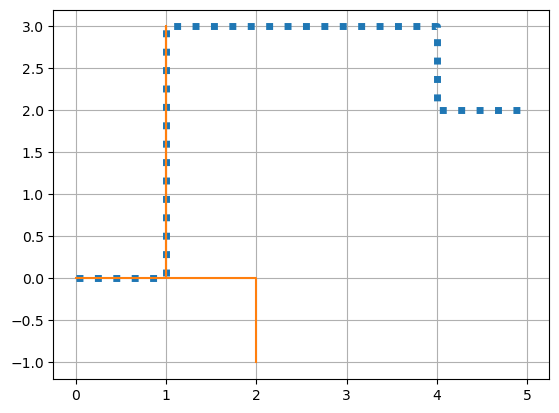

In [43]:
test = initial_SAW(10)
plt.plot(test[0,:],test[1,:],linestyle="dotted",linewidth=5)
new= pivot_step(test)
plt.plot(new[0,:],new[1,:])
plt.grid()
plt.xticks()
plt.show()

In [111]:
test = initial_SAW(1000)
print(test)
print(np.size(test,axis=1))
check_self_avoidance(test)

[[   0    0    0 ...   27   28   28]
 [   0   -1   -2 ... -160 -160 -159]]
1000


False

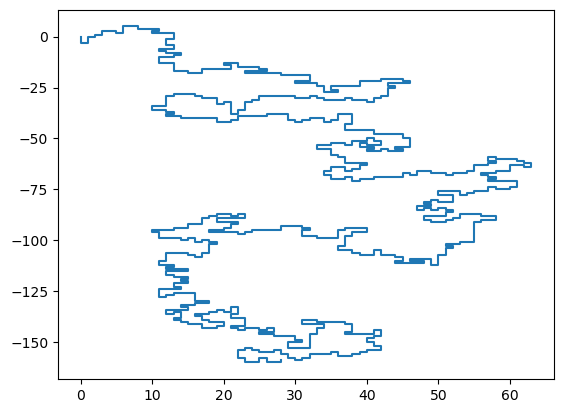

In [112]:
plt.plot(test[0,:],test[1,:])
plt.show()